In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mega import model_df
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



In [44]:
model_df_copy = model_df.copy()

In [45]:
# Handle missing values if needed
model_df_copy.fillna(model_df_copy.mean(numeric_only=True), inplace=True)

In [46]:
# Encode categorical variables if needed
if 'W/L' in model_df_copy.columns:
    label_encoder = LabelEncoder()
    model_df_copy['W/L'] = label_encoder.fit_transform(model_df_copy['W/L'])


In [47]:
# Assuming model_df is your dataframe
print(model_df_copy.dtypes)


Gm#                int64
W/L                int32
D/N               object
H/A               object
Opp               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object


In [48]:
#Convert specific columns
model_df_copy['W/L'] = model_df_copy['W/L'].astype(np.int64)

In [49]:
model_df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, 0 to 1812
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gm#            1751 non-null   int64  
 1   W/L            1751 non-null   int64  
 2   D/N            1751 non-null   object 
 3   H/A            1751 non-null   object 
 4   Opp            1751 non-null   object 
 5   COL_at_bats    1751 non-null   int64  
 6   COL_ba         1751 non-null   float64
 7   COL_hits       1751 non-null   int64  
 8   COL_hr         1751 non-null   int64  
 9   COL_kk         1751 non-null   int64  
 10  COL_obp        1751 non-null   float64
 11  COL_walks      1751 non-null   int64  
 12  Opp_at_bats    1751 non-null   int64  
 13  Opp_ba         1751 non-null   float64
 14  Opp_hits       1751 non-null   object 
 15  OPP_HR_Column  1751 non-null   int64  
 16  OPP_kk         1751 non-null   object 
 17  Opp_obp        1751 non-null   float64
 18  Opp_walks    

In [50]:
model_df_copy

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,1,0,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,1,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,1,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,1,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,1,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,129,0,N,A,NYY,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,130,1,D,A,NYY,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,131,0,D,A,NYY,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,132,1,N,H,MIA,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4


In [51]:
# Separate features and target variable
X = model_df.drop('W/L', axis=1)  # Features
y = model_df['W/L']  # Target variable

In [52]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(X_train.dtypes)  # Print data types of each column


Gm#                int64
D/N               object
H/A               object
Opp               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object


In [54]:
# Assuming X_train is a pandas DataFrame
print(X_train.head())  # Show the first few rows of the DataFrame
print(X_train.info())  # Get information about column data types
print(X_train.describe(include='all'))  # Describe all columns, including non-numeric ones

# Check for non-numeric data
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Non-numeric column '{col}' unique values: {X_train[col].unique()}")


      Gm# D/N H/A  Opp  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
203    42   D   A  KCR           29  0.275862         8       0       1   
1424   69   N   A  MIA           33  0.333333        11       3       6   
820    11   N   H  SDP           37  0.351351        13       2      10   
1270   76   D   A  MIL           39  0.230769         9       3      16   
1627  110   N   A  STL           33  0.333333        11       1       4   

       COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  OPP_HR_Column  \
203   0.322581          2            0  0.000000        0              0   
1424  0.388889          3           30  0.200000        6              1   
820   0.351351          0            0  0.000000        0              0   
1270  0.279070          2           39  0.179487        7              1   
1627  0.394737          4           33  0.212121        7              1   

     OPP_kk   Opp_obp  Opp_walks  
203       0  0.000000          0  
1424      8  0.305556 

In [55]:
le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Ensure X_test is also transformed


In [56]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [59]:
print(X_train.dtypes)  # Print data types of each column


Gm#                int64
D/N                int32
H/A                int32
Opp                int32
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits           int32
OPP_HR_Column      int64
OPP_kk             int32
Opp_obp          float64
Opp_walks          int64
dtype: object


In [60]:
# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}  # Testing from 1 to 20 neighbors

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred = best_knn.predict(X_test_scaled)


Best Parameters: {'n_neighbors': 10}
Best Score: 0.7714285714285714


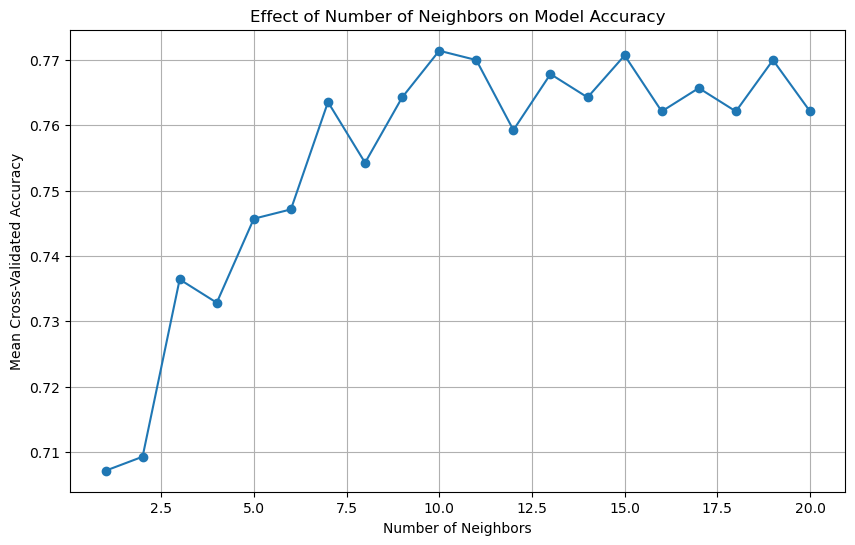

In [61]:
neighbors = list(range(1, 21))
mean_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neighbors, mean_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Effect of Number of Neighbors on Model Accuracy')
plt.grid(True)
plt.show()


In [62]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=10)  # Adjust the number of neighbors as needed
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74
